In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

## MO figures


In [2]:
def read_fim(pre_name, after_name, x_ranges):
    
    a_ranges, d_ranges = [], []
    for i in x_ranges:
        name = pre_name + str(i) + after_name
        with open(name, 'rb') as f:
            fim = pickle.load(f)
            f.close()
            
        a_ranges.append(np.log10(np.trace(fim)))
        d_ranges.append(np.log10(np.linalg.det(fim)))
        
    return a_ranges, d_ranges


In [3]:
x_set = [ 2000, 2500, 3000, 3500, 4000, 4500, 5000, 
        6000, 7000, 8000,9000,10000] 
        #15000, 20000]

milp_a, milp_d = read_fim("./MO_MILP_solution/updated_fim_", "", x_set)

print(milp_a, milp_d)

[9.732093014607184, 9.77480216112448, 9.808792591406771, 9.838793418714772, 9.866033621993497, 9.891178066825255, 9.914258483567508, 9.954280356814856, 9.99403001321937, 10.020403228924492, 10.054754900183495, 10.074284218409607] [13.57838298379179, 15.386500919101069, 15.567777353856645, 16.530390049057598, 16.823529170505108, 17.312804906066315, 17.500045583482198, 18.13037276601848, 18.587507617709477, 19.361480921144988, 19.78272359120207, 19.656861801509468]


In [4]:
def plot_data(x=None, a_nlp=None, d_nlp=None, 
             objective = "A", benchmark_x=None, benchmark_a=None, benchmark_d=None, save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    """
    
    if objective == "A":
        label_nlp = "NLP: A-optimality" 
        color_minlp = "red"
        scatter_minlp = "*"
        color_nlp = "blue"
        scatter_nlp = "."
        marker_size=200
        
    
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
        
    # figure 1 
    
    if a_nlp is not None:
        plt.scatter(x, a_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
        
    if benchmark_a is not None:
        plt.scatter(benchmark_x, benchmark_a, color = color_nlp, s=marker_size, marker=scatter_nlp)
           
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2 
    
        
    if d_nlp is not None: 
        #plt.plot(x, d_nlp, linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
        plt.scatter(x, d_nlp, color=color_minlp, 
                 s=marker_size, marker=scatter_minlp, label=label_nlp)
        
    if benchmark_d is not None:
        plt.scatter(benchmark_x, benchmark_d, color = color_nlp, s=marker_size, marker=scatter_nlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()


In [5]:
ben_a = [1.6, 2.6, 3.6, 4.6, 5.4, 6.4]
#a = [517388737529.7897, 626820211820.128, 776714330195.3566, 918383572214.7427, 918383572734.7631]
#d = [1.3778163974789637e+24, 5.112844592114084e+24, 1.5399505325984444e+25, 1.1416769278261237e+26, 1.1504196219100057e+26]
a = [184951741.2586, 237996661.799, 237998105.53, 241539685.81, 241540085.11, 338966985.012]
d = [215470621519.3354, 25632098225036.39,  609991559658512.0, 966331807575620.8, 966465339494809.1, 1.3099725170871796e+16]
#ben_a = [1.6, 2.6, 3.6, 4.6, 5.4, 6.4, 7.4]

#a = [517388737529.7897, 626820211820.128, 776714330195.3566, 918383572214.7427, 918383572734.7631,
#    1250893649920.2537, 1386971289529.0894]
#d = [1.3778163974789637e+24, 5.112844592114084e+24, 1.5399505325984444e+25, 1.1416769278261237e+26, 
#     1.1504196219100057e+26,
#    1.5237336463279702e+29,
#    1.0841294614205257e+32]


a = [np.log10(i) for i in a]
d = [np.log10(i) for i in d]

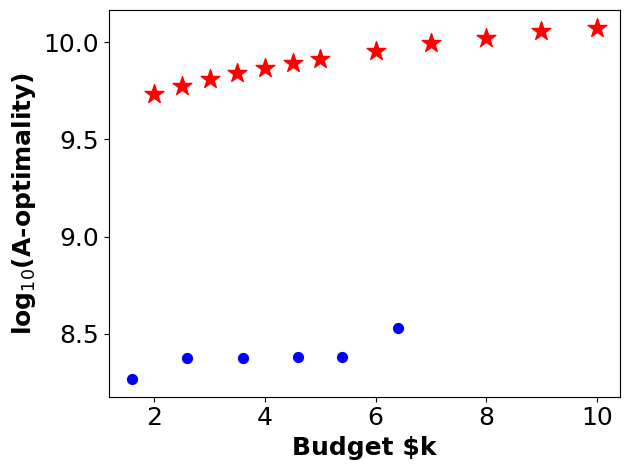

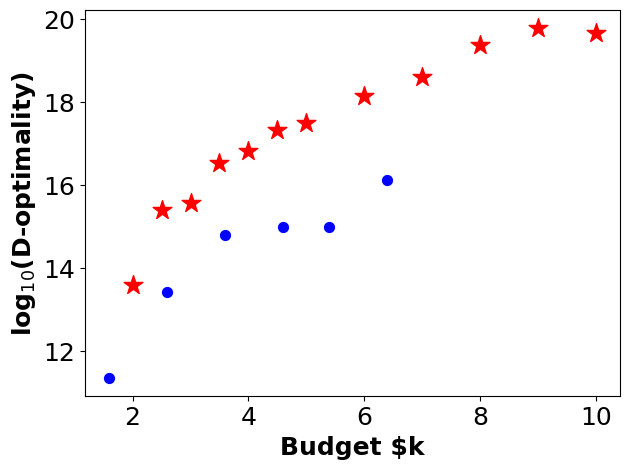

In [6]:
plot_data(x=[i/1000 for i in x_set], a_nlp=milp_a, d_nlp=milp_d, 
             objective = "A", 
          benchmark_x = ben_a, 
          benchmark_a = a, 
          benchmark_d = d, 
          save="MILP")


In [27]:
x_range = [85+273, 87+273, 90+273, 92+273, 95+273]
y_range = [110+273, 115+273, 118+273, 120+273, 125+273]

In [28]:
def read_fim(name_str, x_ranges, y_ranges):
    m = len(x_ranges)
    n = len(y_ranges)
    a_set, d_set = np.zeros((m,n)),  np.zeros((m,n))
    e_set, me_set = np.zeros((m,n)),  np.zeros((m,n))
    
    for i, x in enumerate(x_ranges):
        for j, y in enumerate(y_ranges):
            name = name_str + str(x) + "_" + str(y)
            with open(name, 'rb') as f:
                fim = pickle.load(f)
        
            a_set[i,j] = np.trace(fim)
            d_set[i,j] = np.linalg.det(fim)
            eig = np.linalg.eigvals(fim)
            e_set[i,j] = min(eig)
            me_set[i,j] = max(eig)/min(eig)
        
    return a_set, d_set, e_set, me_set

a_res, d_res, e_res, me_res = read_fim("Nov25_", x_range, y_range)

In [1]:
def heatmap(
        cri_a, 
        cri_d, 
        cri_e,
        cri_e_cond,
        title_text,
        xlabel_text,
        ylabel_text,
        font_axes=16,
        font_tick=14,
        log_scale=True,
    ):

    # decide if log scaled
    if log_scale:
        hes_a = np.log10(cri_a)
        hes_e = np.log10(cri_e)
        hes_d = np.log10(cri_d)
        hes_e2 = np.log10(cri_e_cond)
    else:
        hes_a = cri_a
        hes_e = cri_e
        hes_d = cri_d
        hes_e2 = cri_e_cond

    # set heatmap x,y ranges
    xLabel = x_range
    yLabel = y_range

    # A-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_a.T, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log10(trace(FIM))')
    plt.title(title_text + ' - A optimality')
    plt.show()

    # D-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_d.T, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log10(det(FIM))')
    plt.title(title_text + ' - D optimality')
    plt.show()

    # E-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_e.T, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log10(minimal eig(FIM))')
    plt.title(title_text + ' - E optimality')
    plt.show()

    # modified E-optimality
    fig = plt.figure()
    plt.rc('axes', titlesize=font_axes)
    plt.rc('axes', labelsize=font_axes)
    plt.rc('xtick', labelsize=font_tick)
    plt.rc('ytick', labelsize=font_tick)
    ax = fig.add_subplot(111)
    params = {'mathtext.default': 'regular'}
    plt.rcParams.update(params)
    ax.set_yticks(range(len(yLabel)))
    ax.set_yticklabels(yLabel)
    ax.set_ylabel(ylabel_text)
    ax.set_xticks(range(len(xLabel)))
    ax.set_xticklabels(xLabel)
    ax.set_xlabel(xlabel_text)
    im = ax.imshow(hes_e2.T, cmap=plt.cm.hot_r)
    ba = plt.colorbar(im)
    ba.set_label('log10(cond(FIM))')
    plt.title(title_text + ' - Modified E-optimality')
    plt.show()

In [ ]:
a_res = 

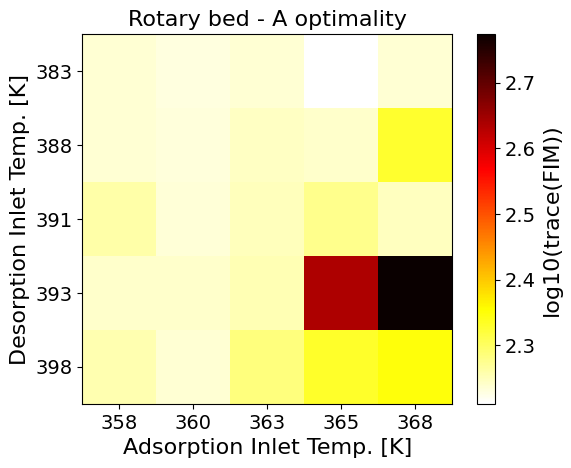

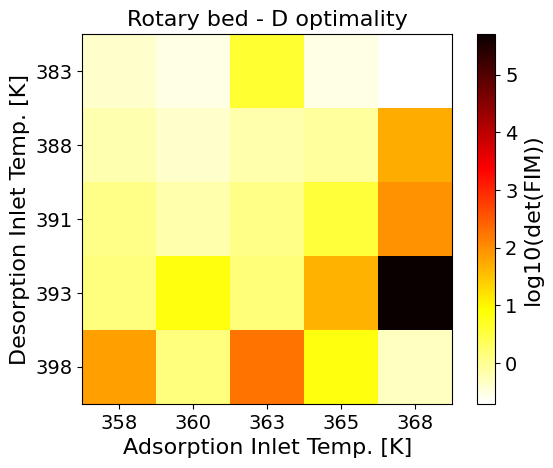

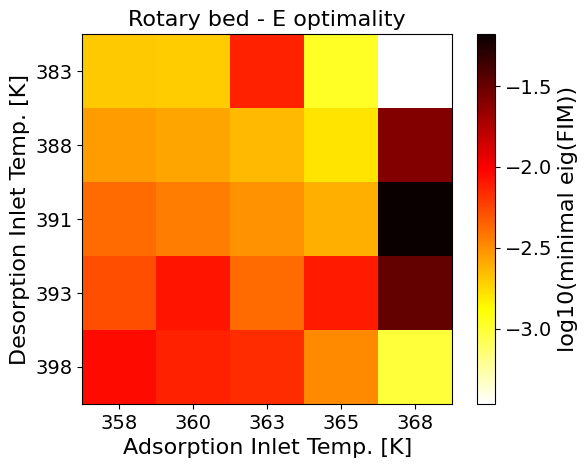

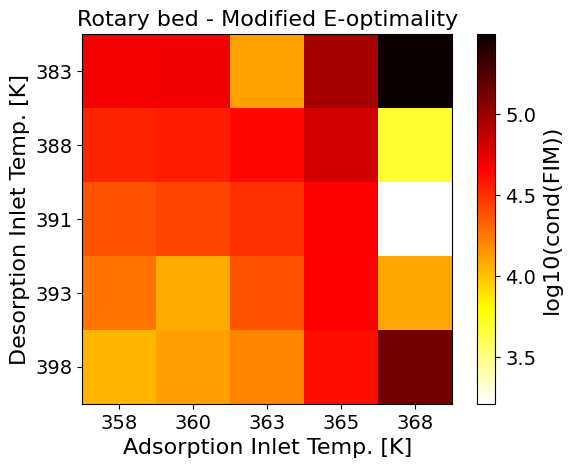

In [30]:
heatmap(a_res, d_res, e_res, me_res, 
       "Rotary bed", "Adsorption Inlet Temp. [K]", 
       "Desorption Inlet Temp. [K]")

In [18]:
def plot_data(x=None, a_nlp=None, d_nlp=None, 
             objective = "A", save=None):
    """
    objective means these solutions are based on what objective function. 
    For e.g., if it's A, it means it's A-optimality solution. We can still analyze its determinant value. 
    """
    
    if objective == "A":
        label_nlp = "NLP: A-optimality" 
        color_minlp = "red"
        scatter_minlp = "*"
        color_nlp = "blue"
        scatter_nlp = "."
        marker_size=10
        
    
    si=18
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    si_legend = 16
        
    # figure 1 
    
    if a_nlp is not None:
        plt.plot(x, np.log10(a_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
           
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2 
    
        
    if d_nlp is not None: 
        plt.plot(x, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()


def read_fim(name_str, ranges, obj="_a"):
    a_set, d_set = [], []
    
    for i in ranges:
        #name = name_str+str(i)
        name = name_str + str(i) + obj
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        a_set.append(np.trace(x))
        d_set.append(np.linalg.det(x))
        
    return a_set, d_set
        

In [32]:
def read_fim(pre_name, after_name, x_ranges):
    
    a_ranges, d_ranges = [], []
    for i in x_ranges:
        name = pre_name + str(i) + after_name
        with open(name, 'rb') as f:
            fim = pickle.load(f)
            f.close()
            
        a_ranges.append(np.trace(fim))
        d_ranges.append(np.linalg.det(fim))
        
    return a_ranges, d_ranges


In [51]:
x_axis = [2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]

a, d = read_fim("Jan15_fim_","_a", x_axis)
print(a,d)

[51912478.298595265, 52231466.75138447, 52352801.52207442, 52420038.99717866, 52459011.53259698, 52472232.61066305, 52481020.36003231, 52488961.948646225, 52488227.74387965, 52489316.20247769, 52489355.75958294, 52489830.26486408] [-5685097507.913621, -5194867604.457466, 3641032233.7244773, -30902877536.70053, 0.0, -199750612986.25385, -13964558259.107616, 0.0, 0.0, -15535959170.649427, 0.0, 0.0]


In [46]:
with open("Jan10_8000_a", 'rb') as f:
    sol = pickle.load(f)
    f.close()
    
file = open("./MO_QVs/name_z3_jan", "rb")
name_original = pickle.load(file)
file.close()

sol_idx = []
for i in range(len(sol)):
    if sol[i][i] != 0:
        sol_idx.append(i)
        #print(sol[i][i])
name_sol = []

for i in sol_idx:
    name_sol.append(i)
print(name_sol)
print(len(name_sol))

[37, 43, 52, 63, 64, 72, 73, 75, 76, 117, 118, 119, 123, 124, 126, 127, 129, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 153, 154, 156, 159]
35


In [47]:
with open("Jan10_7000_a", 'rb') as f:
    comsol = pickle.load(f)
    f.close()
    
comsol_idx = []
for i in range(len(sol)):
    if comsol[i][i] != 0:
        comsol_idx.append(i)
        
print(len(comsol_idx))
        
for i in sol_idx:
    if i not in comsol_idx:
        print(i)

34
37


In [ ]:
file2 = open('Sep17_fim_'+str(budget_opt)+'_a', 'wb')

    pickle.dump(fim_result, file2)

    file2.close()

In [16]:
x_axis = [2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8]

A_opt = [566164838.584476, 
         566356930.0803374,
         566483303.9489152, 
         566542201.3822612, 
         566572111.275622,
         566588846.6138612, 
         566597918.3998365,
         566607229.6241033,
         566608831.5780683,
         566609142.1570723
        ]

D_opt = [6.00606166772268e+26, 
         9.607293095247999e+26, 
         1.010903552438174e+27,
         1.119963370952365e+27, 
         1.7510046930710688e+27, 
        2.5578742981163787e+27, 
          3.384453629642643e+27,
          4.1334534968107116e+27, 
        4.2092695353447515e+27,4.2097550226444183e+27
        ]

In [2]:
x_axis = [2000, 3000, 4000, 5000, 6000]

A_opt = [ 1834.3022694507597, 
    696.2136442699793, 
         59.26150997300809, 
         59.26150997300809, 
         393.79461464065463
         
]

D_opt = [ 114.24221993669939, 
         -65.72551089407547, 
         0.9775353312359789, 
         0.9775353312359789, 
         11.91517726433571

    
]

In [10]:
x_axis = [2000, 2600, 3800, 4000, 5000]

A_opt = [ 1834.3022694507597, 
    696.2136442699793, 
         59.26150997300809, 
         59.26150997300809, 
         393.79461464065463
         
]

D_opt = [ -3.023616138056185e-17, 
          -5.747309187474934e-17, 
         1.647213522093071, 
         0.35657965297192573, 
         1.4646646076806702e-17

    
]

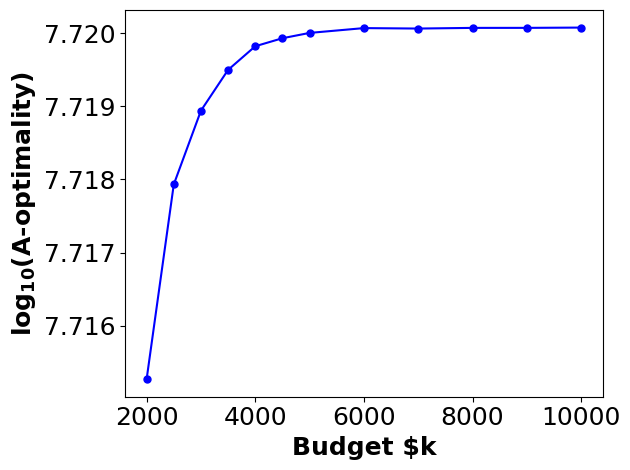

/tmp/ipykernel_49301/824660400.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)
/tmp/ipykernel_49301/824660400.py:44: RuntimeWarning: invalid value encountered in log10
  plt.plot(x, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, marker=scatter_nlp, label=label_nlp)


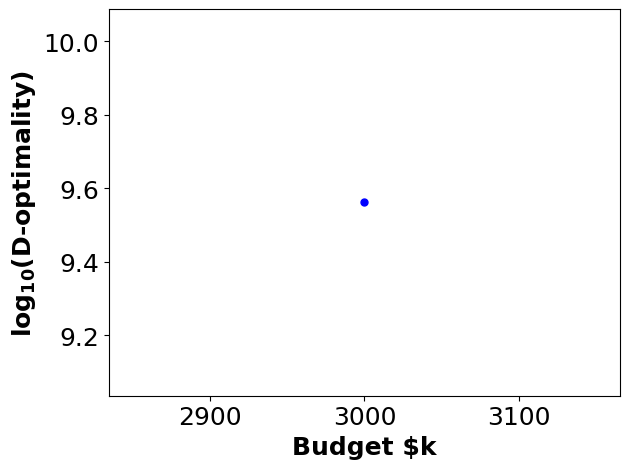

In [52]:
plot_data(x=x_axis, a_nlp = a, d_nlp = d)